# Topological Indices

We are printing the topological indices of the graph. 
The topological indices are the number of nodes, the number of edges.

The invariants of a graph which are used for structure-property or structure-activity correlations are ususally called topological indices.

## Used Modules

We are using the following modules:
- `networkx` for graph operations
- `grinpy` for graph operations
- `matplotlib` for plotting

In [1]:
import networkx as nx
import grinpy as gp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize


## Creating a sample graph

Using `networkx.barabasi_albert_graph` we create a sample graph.
In this case we create a graph with 100 nodes and 3 edges per node.

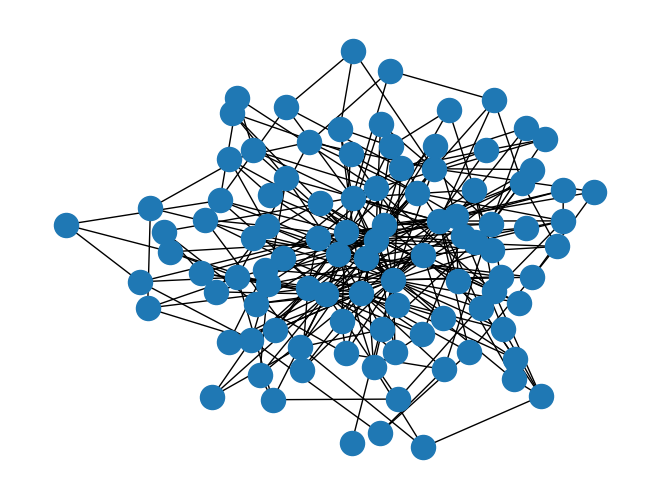

In [2]:
G_1 = nx.barabasi_albert_graph(100, 3)
nx.draw(G_1, with_labels=False)

## Calculate the topological indices


In [3]:
# convert to function

def topological_indices(G):
    ''' Create a dictionary with the topological indices of a graph G.'''
    topological_indices = {}
    topological_indices['randic_index'] = gp.randic_index(G)
    topological_indices['generalized_randic_index'] = gp.generalized_randic_index(
        G, 2)
    topological_indices['harmonic_index'] = gp.harmonic_index(G)
    topological_indices['atom_bond_connectivity_index'] = gp.atom_bond_connectivity_index(
        G)
    topological_indices['sum_connectivity_index'] = gp.sum_connectivity_index(
        G)
    topological_indices['first_zagreb_index'] = gp.first_zagreb_index(G)
    topological_indices['second_zagreb_index'] = gp.second_zagreb_index(G)

    return topological_indices


print(topological_indices(G_1))


{'randic_index': 43.08690360177496, 'generalized_randic_index': 8287213.0, 'harmonic_index': 38.21022676629139, 'atom_bond_connectivity_index': 154.21390732951008, 'sum_connectivity_index': 71.50956834543312, 'first_zagreb_index': 6294.0, 'second_zagreb_index': 29453.0}


## Compare the topological indices

Next, we compare the topological indices of the graph with the topological indices of the graph with the same number of nodes and edges.
As they don't have to be isomorphic, we use the `nx.is_isomorphic` function to check if the graphs are isomorphic.

### Create a graph with the same number of nodes and edges

In [4]:
G_2 = nx.barabasi_albert_graph(100, 3)

graphs_isomorphic = nx.is_isomorphic(G_1, G_2)

print(f'Graphs G_1 and G_2 are isomorphic: {graphs_isomorphic}')

Graphs G_1 and G_2 are isomorphic: False


### Compare the topological indices

We use a matplotlob histogram to compare the topological indices of the two graphs.

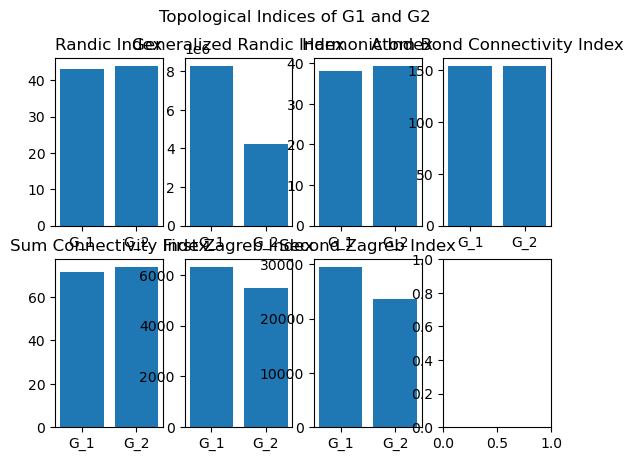

In [5]:
# matplotlib histogram compare g_1_TI and g_2_TI

g_1_TI = topological_indices(G_1)
g_2_TI = topological_indices(G_2)

g_1_ti_values = list(g_1_TI.values())
g_2_ti_values = list(g_2_TI.values())
labels = list(g_1_TI.keys())

# Make the plot
fig, axs = plt.subplots(2, 4)

axs[0, 0].set_title('Randic Index')
axs[0, 0].bar(['G_1', 'G_2'], [g_1_ti_values[0], g_2_ti_values[0]])

axs[0, 1].set_title('Generalized Randic Index')
axs[0, 1].bar(['G_1', 'G_2'], [g_1_ti_values[1], g_2_ti_values[1]])

axs[0, 2].set_title('Harmonic Index')
axs[0, 2].bar(['G_1', 'G_2'], [g_1_ti_values[2], g_2_ti_values[2]])

axs[0, 3].set_title('Atom Bond Connectivity Index')
axs[0, 3].bar(['G_1', 'G_2'], [g_1_ti_values[3], g_2_ti_values[3]])

axs[1, 0].set_title('Sum Connectivity Index')
axs[1, 0].bar(['G_1', 'G_2'], [g_1_ti_values[4], g_2_ti_values[4]])

axs[1, 1].set_title('First Zagreb Index')
axs[1, 1].bar(['G_1', 'G_2'], [g_1_ti_values[5], g_2_ti_values[5]])

axs[1, 2].set_title('Second Zagreb Index')
axs[1, 2].bar(['G_1', 'G_2'], [g_1_ti_values[6], g_2_ti_values[6]])

fig.suptitle('Topological Indices of G1 and G2')
plt.show()


(array([61., 23.,  6.,  5.,  1.,  1.,  0.,  1.,  0.,  2.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

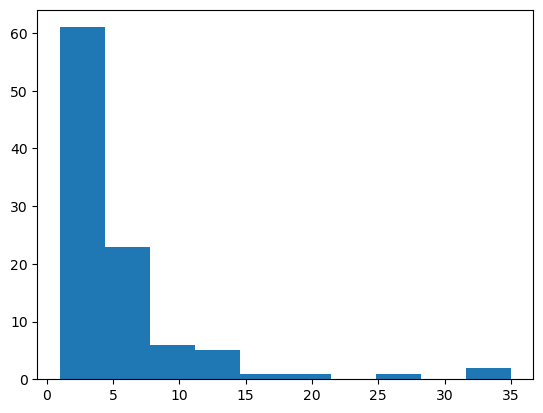

In [7]:
# TODO Simplify plotting!!

plt.hist([v for k,v in nx.degree(G_1)])